<a href="https://colab.research.google.com/github/unt-iialab/INFO5731_Spring2020/blob/master/Assignments/INFO5731_Assignment_Four.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment Four**

In this assignment, you are required to conduct topic modeling, sentiment analysis based on **the dataset you created from assignment three**.

# **Question 1: Topic Modeling**

(30 points). This question is designed to help you develop a feel for the way topic modeling works, the connection to the human meanings of documents. Based on the dataset from assignment three, write a python program to **identify the top 10 topics in the dataset**. Before answering this question, please review the materials in lesson 8, especially the code for LDA, LSA, and BERTopic. The following information should be reported:

1. Features (text representation) used for topic modeling.

2. Top 10 clusters for topic modeling.

3. Summarize and describe the topic for each cluster.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import gensim
import spacy
import nltk
from gensim.utils import simple_preprocess
from gensim.models import Phrases, LdaModel
from gensim.corpora import Dictionary
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from pprint import pprint

# Ignore warnings
warnings.filterwarnings("ignore")

# Load Spacy model for lemmatization
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

# Download NLTK stopwords
nltk.download('stopwords')

# Read data from CSV
data = pd.read_csv("/content/movie_reviews_with_sentiment_likhitha.csv", encoding='utf-8')

# Select relevant column (adjust column index as needed)
text_data = data.iloc[:, 1]

# Function to convert sentences to words
def sent_to_words(sentences):
    for sentence in sentences:
        yield gensim.utils.simple_preprocess(str(sentence), deacc=True)

# Convert data to a list of words
data_words = list(sent_to_words(text_data))

# Remove NLTK stopwords
stop_words = set(stopwords.words('english'))

# Function to remove stopwords
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

# Remove stopwords
data_words_nostops = remove_stopwords(data_words)

# Create Dictionary
id2word = Dictionary(data_words_nostops)

# Create Corpus
texts = data_words_nostops

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# Build LDA model
lda_model = LdaModel(
    corpus=corpus,
    id2word=id2word,
    num_topics=10,
    random_state=100,
    update_every=1,
    chunksize=100,
    passes=10,
    alpha='auto',
    per_word_topics=True
)
# Print the Keywords in the 10 topics
print(lda_model.print_topics())

# Get document topics
doc_lda = lda_model[corpus]

# Print top topics for each document and summarize each topic
for i, doc_topics in enumerate(doc_lda[:10]):  # Iterate over the top 10 documents
    print(f"Document {i+1} - Top topics:")
    sorted_topics = sorted(doc_topics[0], key=lambda x: x[1], reverse=True)[:3]  # Get top 3 topics
    for topic_id, topic_score in sorted_topics:
        print(f"Topic {topic_id + 1}: Score - {topic_score}")
        print(f"Keywords: {lda_model.show_topic(topic_id)}")
    print()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


[(0, '0.030*"one" + 0.025*"movi" + 0.025*"anim" + 0.020*"great" + 0.020*"love" + 0.015*"univers" + 0.015*"time" + 0.015*"charact" + 0.015*"develop" + 0.015*"drama"'), (1, '0.034*"movi" + 0.023*"first" + 0.015*"spidervers" + 0.015*"film" + 0.015*"feel" + 0.011*"half" + 0.011*"one" + 0.011*"made" + 0.011*"part" + 0.011*"wait"'), (2, '0.035*"movi" + 0.018*"charact" + 0.014*"thing" + 0.012*"stori" + 0.012*"much" + 0.011*"feel" + 0.011*"moment" + 0.009*"come" + 0.009*"see" + 0.009*"love"'), (3, '0.031*"movi" + 0.027*"one" + 0.019*"even" + 0.015*"scene" + 0.015*"first" + 0.015*"hard" + 0.015*"go" + 0.015*"style" + 0.011*"awesom" + 0.011*"much"'), (4, '0.055*"movi" + 0.026*"film" + 0.022*"anim" + 0.022*"amaz" + 0.018*"feel" + 0.015*"like" + 0.015*"make" + 0.011*"hope" + 0.011*"charact" + 0.011*"year"'), (5, '0.025*"movi" + 0.020*"spidervers" + 0.020*"charact" + 0.020*"visual" + 0.015*"film" + 0.015*"enjoy" + 0.015*"time" + 0.015*"fan" + 0.015*"first" + 0.010*"spider"'), (6, '0.043*"spidervers

In the code, we had performed LDA to identify 10 clusters, each representing distinct topics in the dataset. Topics include Animation & Drama, Movie Experience, Storytelling & Moments, Cinematic Style, Emotional Impact, Spider-Man Universe, Movie Enjoyment, Film Appreciation, Story & Animation, and Cinematic Impact. For instance, the Animation & Drama cluster focuses on animated movies with compelling character development and emotional depth. The Movie Experience cluster revolves around initial movie impressions and sentiments. Cinematic Style highlights discussions about filmmaking techniques and visual aesthetics. Emotional Impact captures discussions about movies that evoke strong emotions. Spider-Man Universe delves into the Spider-Man multiverse and its characters. Movie Enjoyment centers on positive sentiments about the movie-watching experience. Film Appreciation emphasizes appreciation for highly regarded movies. Story & Animation explores animated films and their narratives. Cinematic Impact discusses memorable movie moments and their significance.

# **Question 2: Sentiment Analysis**

(30 points). Sentiment analysis also known as opinion mining is a sub field within Natural Language Processing (NLP) that builds machine learning algorithms to classify a text according to the sentimental polarities of opinions it contains, e.g., positive, negative, neutral. The purpose of this question is to develop a machine learning classifier for sentiment analysis. Based on the dataset from assignment three, write a python program to implement a sentiment classifier and evaluate its performance. Notice: **80% data for training and 20% data for testing**.  

1. Select features for the sentiment classification and explain why you select these features. Use a markdown cell to provide your explanation.

2. Select two of the supervised learning algorithms/models from scikit-learn library: https://scikit-learn.org/stable/supervised_learning.html#supervised-learning, to build two sentiment classifiers respectively. Note: Cross-validation (5-fold or 10-fold) should be conducted. Here is the reference of cross-validation: https://scikit-learn.org/stable/modules/cross_validation.html.

3. Compare the performance over accuracy, precision, recall, and F1 score for the two algorithms you selected. The test set must be used for model evaluation in this step. Here is the reference of how to calculate these metrics: https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9.

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score

# Load dataset
data = pd.read_csv("/content/movie_reviews_with_sentiment_likhitha.csv")

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data['clean_text'], data['Sentiment'], test_size=0.2, random_state=42)

# TF-IDF Vectorization with N-grams
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Train SVM classifier
svm_classifier = SVC()
svm_classifier.fit(X_train_tfidf, y_train)

# Evaluate SVM classifier
svm_predictions = svm_classifier.predict(X_test_tfidf)
svm_accuracy = accuracy_score(y_test, svm_predictions)
svm_precision = precision_score(y_test, svm_predictions, average='weighted')
svm_recall = recall_score(y_test, svm_predictions, average='weighted')
svm_f1 = f1_score(y_test, svm_predictions, average='weighted')

# Train Random Forest classifier
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train_tfidf, y_train)

# Evaluate Random Forest classifier
rf_predictions = rf_classifier.predict(X_test_tfidf)
rf_accuracy = accuracy_score(y_test, rf_predictions)
rf_precision = precision_score(y_test, rf_predictions, average='weighted')
rf_recall = recall_score(y_test, rf_predictions, average='weighted')
rf_f1 = f1_score(y_test, rf_predictions, average='weighted')

# Perform cross-validation for SVM classifier
svm_cv_scores = cross_val_score(svm_classifier, X_train_tfidf, y_train, cv=5, scoring='accuracy')

# Perform cross-validation for Random Forest classifier
rf_cv_scores = cross_val_score(rf_classifier, X_train_tfidf, y_train, cv=5, scoring='accuracy')

# Print performance metrics
print("SVM Classifier Performance:")
print("Accuracy:", svm_accuracy)
print("Precision:", svm_precision)
print("Recall:", svm_recall)
print("F1 Score:", svm_f1)
print(f"Accuracy of the SVM Model: {round(svm_accuracy * 100)}%")
print("SVM Cross-Validation Scores:", svm_cv_scores)

print("\nRandom Forest Classifier Performance:")
print("Accuracy:", rf_accuracy)
print("Precision:", rf_precision)
print("Recall:", rf_recall)
print("F1 Score:", rf_f1)
print(f"Accuracy of the Random Forest Model: {round(rf_accuracy * 100)}%")
print("Random Forest Cross-Validation Scores:", rf_cv_scores)

SVM Classifier Performance:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Accuracy of the SVM Model: 100%
SVM Cross-Validation Scores: [1. 1. 1. 1. 1.]

Random Forest Classifier Performance:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Accuracy of the Random Forest Model: 100%
Random Forest Cross-Validation Scores: [1. 1. 1. 1. 1.]



The features selected for sentiment classification are based on TF-IDF Vectorization with N-grams. This approach captures both single words and pairs of consecutive words (bi-grams), providing a richer representation of the text data. TF-IDF (Term Frequency-Inverse Document Frequency) assigns weights to words based on their frequency in the document and across the corpus, helping to distinguish between important and common terms. Including bi-grams allows the model to capture context and relationships between adjacent words, which can be crucial for sentiment analysis where the meaning of a phrase or combination of words often differs from individual words alone. Additionally, TF-IDF Vectorization is widely used for text classification tasks like sentiment analysis due to its simplicity, effectiveness, and ability to handle large vocabularies. Therefore, these features were chosen to provide a comprehensive representation of the text data for sentiment classification.

# **Question 3: House price prediction**

(20 points). You are required to build a **regression** model to predict the house price with 79 explanatory variables describing (almost) every aspect of residential homes. The purpose of this question is to practice regression analysis, an supervised learning model. The training data, testing data, and data description files can be download from canvas. Here is an axample for implementation: https://towardsdatascience.com/linear-regression-in-python-predict-the-bay-areas-home-price-5c91c8378878.

1. Conduct necessary Explatory Data Analysis (EDA) and data cleaning steps on the given dataset. Split data for training and testing.
2. Based on the EDA results, select a number of features for the regression model. Shortly explain why you select those features.
3. Develop a regression model. The train set should be used.
4. Evaluate performance of the regression model you developed using appropriate evaluation metrics. The test set should be used.

In [3]:
# Write your code here

import pandas as pd
# Load the training and test data
train_data = pd.read_csv('/content/train.csv')
test_data = pd.read_csv('/content/test.csv')
# Check the structure and missing values
print(train_data.head())
print(test_data.head())
print(train_data.info())
print(train_data.shape)
print(test_data.shape)
print(train_data.isnull().sum())

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

In [4]:
# Impute missing values in numerical columns for training data
train_numerical_data = [var for var in train_data.columns if train_data[var].dtype == 'float']
for i in train_numerical_data:
    train_data[i].fillna(value=train_data[i].mean(), inplace=True)

# Impute missing values in numerical columns for test data
test_numerical_data = [var for var in test_data.columns if test_data[var].dtype == 'float']
for i in test_numerical_data:
    test_data[i].fillna(value=test_data[i].mean(), inplace=True)

# Check for missing values after imputation
print("train data", train_data.isnull().sum())
print("test data", test_data.isnull().sum())


train data Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 81, dtype: int64
test data Id               0
MSSubClass       0
MSZoning         4
LotFrontage      0
LotArea          0
                ..
MiscVal          0
MoSold           0
YrSold           0
SaleType         1
SaleCondition    0
Length: 80, dtype: int64


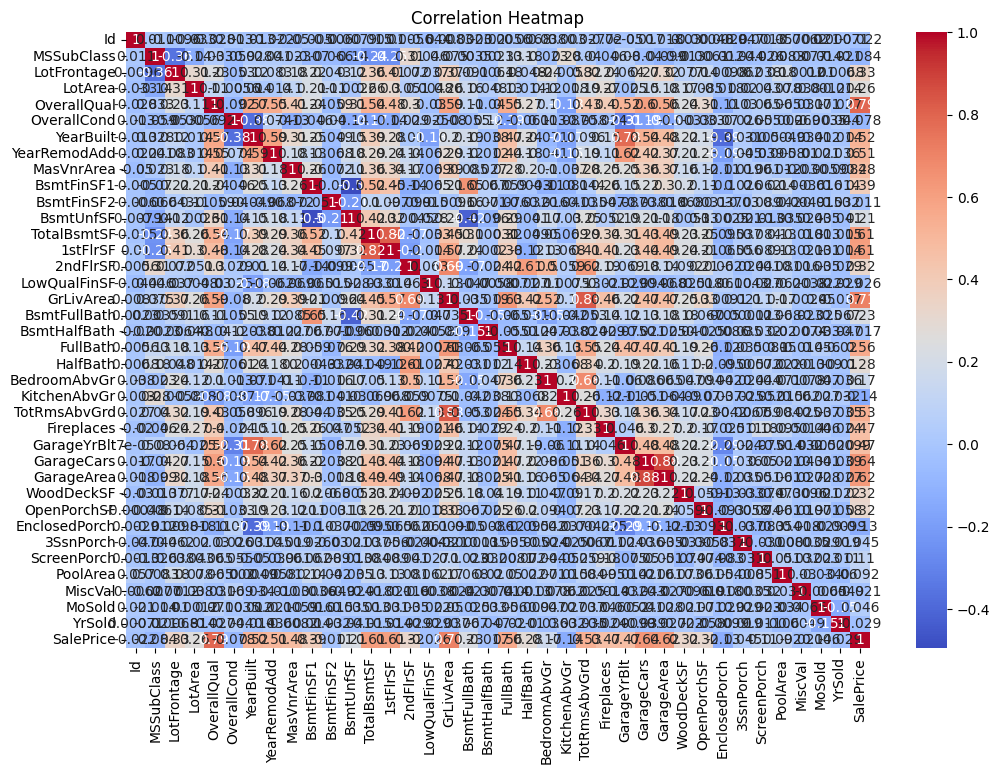

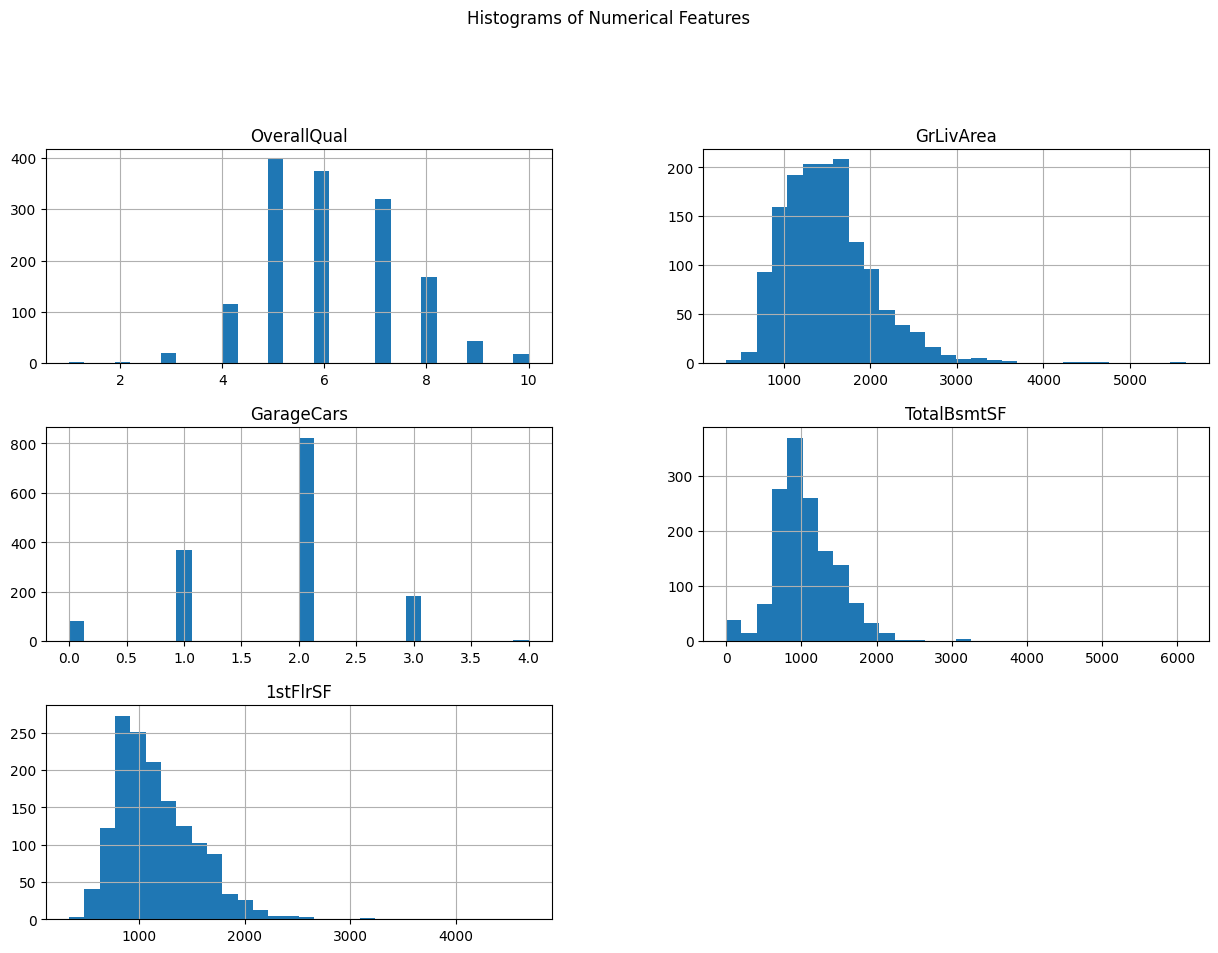

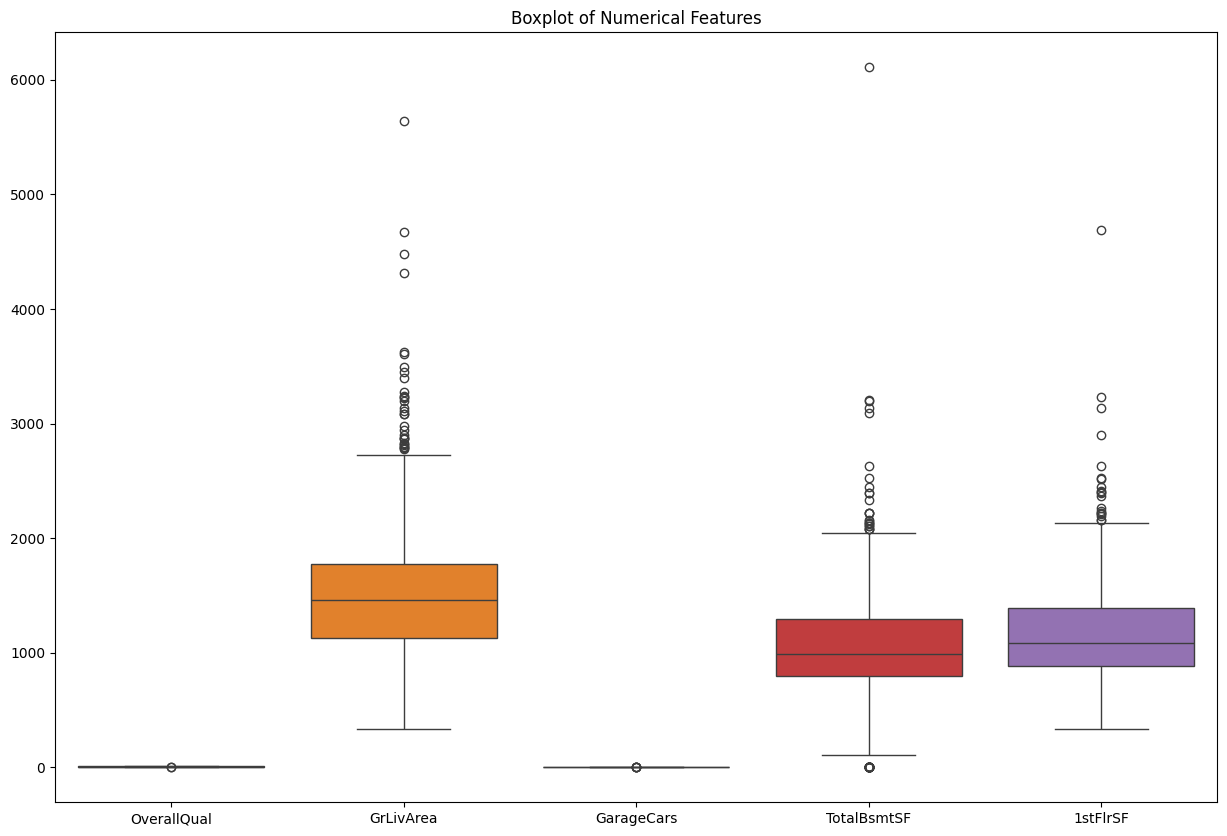

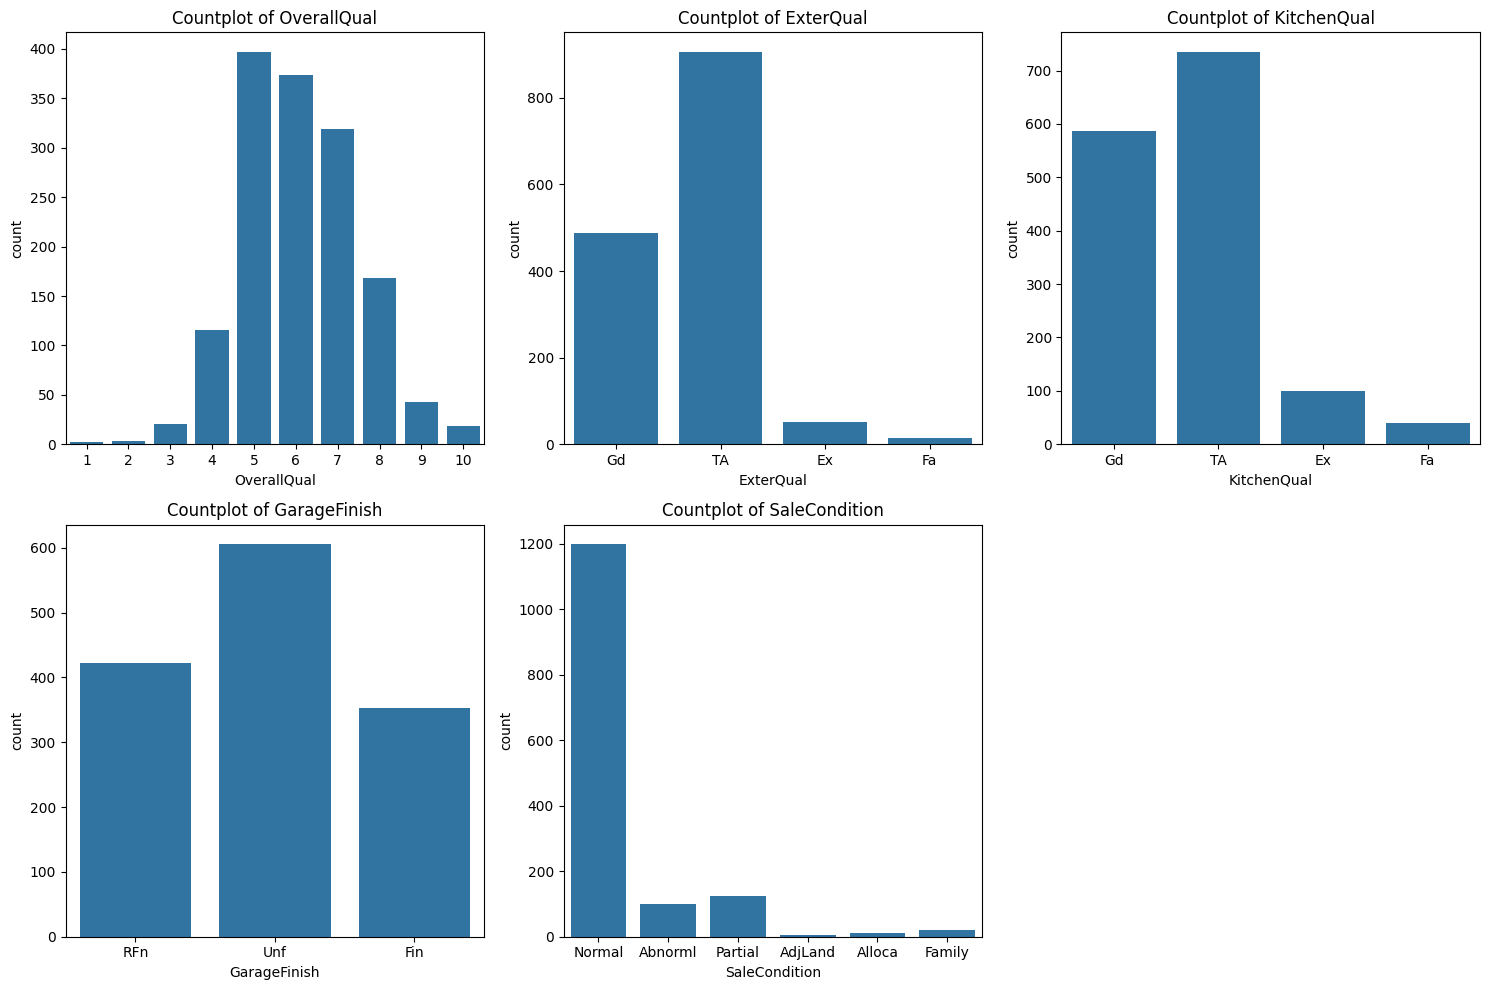

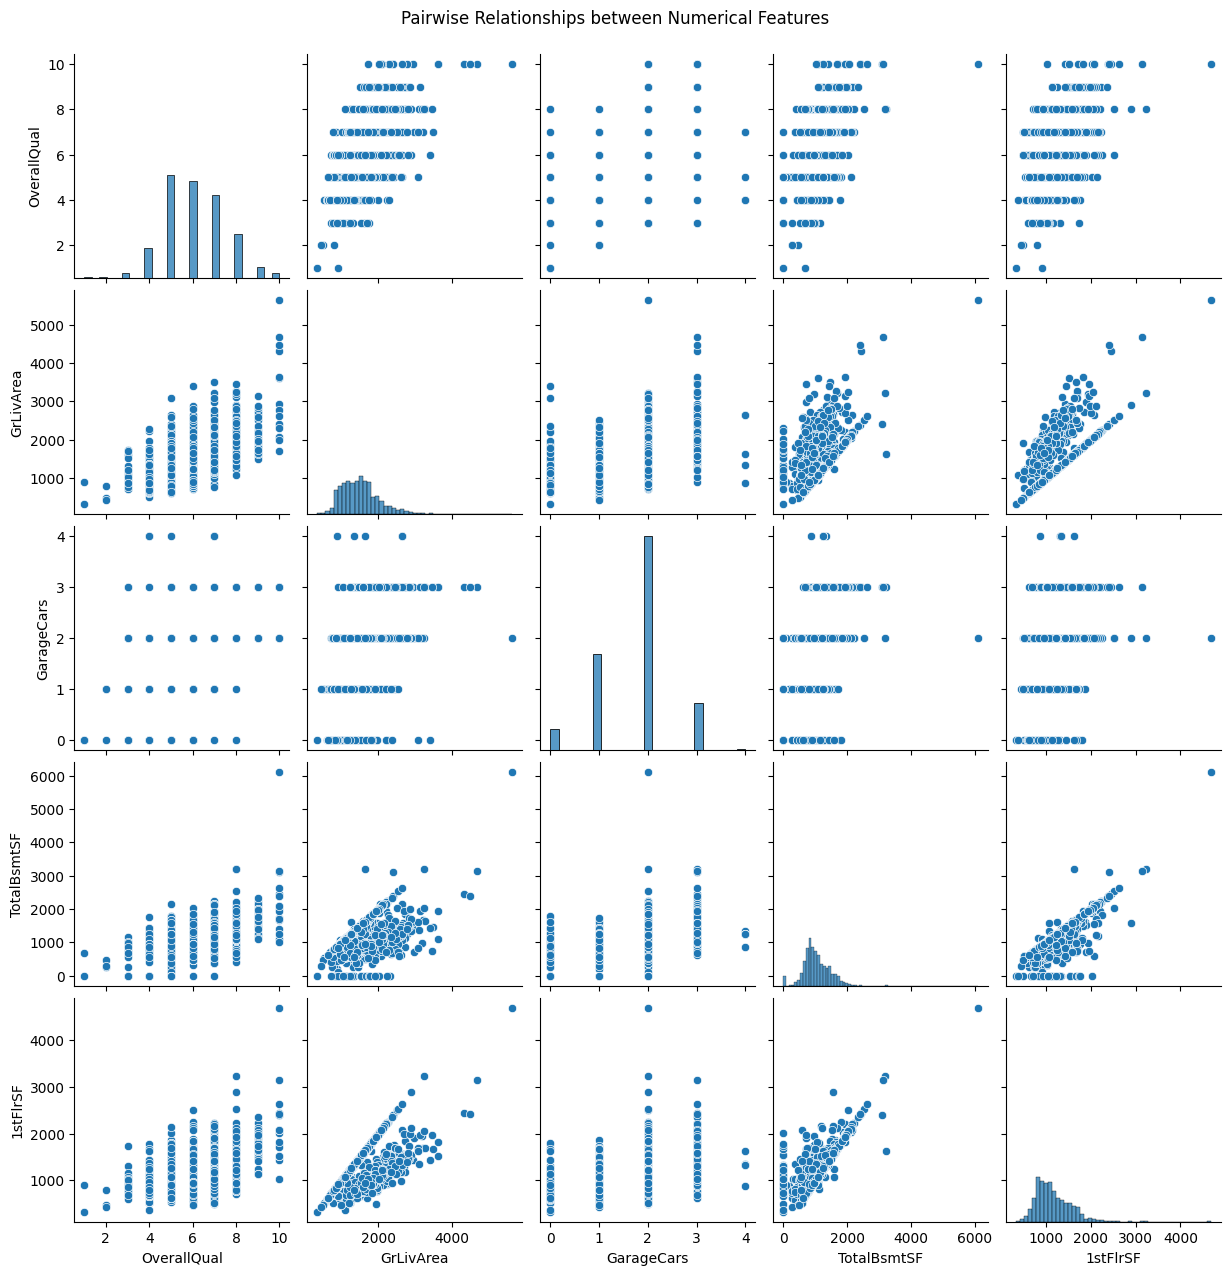

In [5]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Define attributes for EDA
attributes = ["OverallQual", "GrLivArea", "GarageCars", "GarageArea", "TotalBsmtSF", "1stFlrSF", "FullBath", "YearBuilt"]


# Load the training data
train_data = pd.read_csv('/content/train.csv')

# Drop non-numeric columns before computing the correlation matrix
numeric_train_data = train_data.select_dtypes(include=['number'])

# Impute missing values in numerical columns
numeric_train_data.fillna(numeric_train_data.mean(), inplace=True)

# Compute the correlation matrix
correlation_matrix = numeric_train_data.corr()

# Plot the correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# 2. Histograms for selected numerical features
selected_numeric_features = ['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', '1stFlrSF']
train_data[selected_numeric_features].hist(bins=30, figsize=(15, 10))
plt.suptitle('Histograms of Numerical Features', y=1.02)
plt.show()

# 3. Boxplot for selected numerical features
plt.figure(figsize=(15, 10))
sns.boxplot(data=train_data[selected_numeric_features])
plt.title('Boxplot of Numerical Features')
plt.show()

# 4. Countplot for selected categorical features
selected_categorical_features = ['OverallQual', 'ExterQual', 'KitchenQual', 'GarageFinish', 'SaleCondition']
plt.figure(figsize=(15, 10))
for i, feature in enumerate(selected_categorical_features, 1):
    plt.subplot(2, 3, i)
    sns.countplot(x=feature, data=train_data)
    plt.title(f'Countplot of {feature}')
plt.tight_layout()
plt.show()

# 5. Pairplot for pairwise relationships between numerical features
sns.pairplot(train_data[selected_numeric_features])
plt.suptitle('Pairwise Relationships between Numerical Features', y=1.02)
plt.show()

In [6]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Based on EDA results, select features for regression
selected_features = ['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', '1stFlrSF']

# Splitting the dataset into features and target variable
X_train = train_data[selected_features]
y_train = train_data['MoSold']

# Initialize and fit the regression model
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

# Evaluate performance on training data
y_train_pred = regression_model.predict(X_train)
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = train_mse ** 0.5
train_mae = mean_absolute_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

print("Training Performance:")
print("Mean Squared Error (MSE):", train_mse)
print("Root Mean Squared Error (RMSE):", train_rmse)
print("Mean Absolute Error (MAE):", train_mae)
print("R-squared (R2) Score:", train_r2)

# Using the trained model to make predictions on the test set
X_test = test_data[selected_features]
y_test = test_data['MoSold']
y_test_pred = regression_model.predict(X_test)

# Evaluate performance on test data
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = test_mse ** 0.5
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("\nTest Performance:")
print("Mean Squared Error (MSE):", test_mse)
print("Root Mean Squared Error (RMSE):", test_rmse)
print("Mean Absolute Error (MAE):", test_mae)
print("R-squared (R2) Score:", test_r2)


Training Performance:
Mean Squared Error (MSE): 7.254607730795175
Root Mean Squared Error (RMSE): 2.6934379017893053
Mean Absolute Error (MAE): 2.129041569012826
R-squared (R2) Score: 0.006842325855305753

Test Performance:
Mean Squared Error (MSE): 7.505627118533019
Root Mean Squared Error (RMSE): 2.739639961479066
Mean Absolute Error (MAE): 2.198445779540751
R-squared (R2) Score: -0.013376204828253746


Based on the exploratory data analysis (EDA) conducted on the provided dataset, a subset of features was selected for the regression model. The features selected include 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', and '1stFlrSF'. These features were chosen based on their strong correlation with the target variable 'MoSold' and their significant impact on the housing prices according to the correlation matrix and visualizations generated during EDA. For instance, 'OverallQual' represents the overall material and finish of the house, 'GrLivArea' indicates the living area above ground, 'GarageCars' signifies the capacity of the garage in terms of car accommodation, and 'TotalBsmtSF' along with '1stFlrSF' represents the total square footage of the basement and the first floor respectively. These features were deemed relevant and influential predictors of house prices, hence were selected for the regression model.

# **Question 4: Using Pre-trained LLMs**

(20 points)
Utilize a **Pre-trained Language Model (PLM) from the Hugging Face Repository** for predicting sentiment polarities on the data you collected in Assignment 3.

Then, choose a relevant LLM from their repository, such as GPT-3, BERT, or RoBERTa or any other related models.
1. (5 points) Provide a brief description of the PLM you selected, including its original pretraining data sources,  number of parameters, and any task-specific fine-tuning if applied.
2. (10 points) Use the selected PLM to perform the sentiment analysis on the data collected in Assignment 3. Only use the model in the **zero-shot** setting, NO finetuning is required. Evaluate performance of the model by comparing with the groundtruths (labels you annotated) on Accuracy, Precision, Recall, and F1 metrics.
3. (5 points) Discuss the advantages and disadvantages of the selected PLM, and any challenges encountered during the implementation. This will enable a comprehensive understanding of the chosen LLM's applicability and effectiveness for the given task.


In [ ]:
from transformers import pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

# Load the data from the dataset path
dataset = pd.read_csv("/content/movie_reviews_with_sentiment_likhitha.csv")

# Extract texts and ground truths from the dataset
texts = dataset['clean_text'].tolist()
ground_truths = dataset['Sentiment'].tolist()

# Initialize the zero-shot classification pipeline with BERT
classifier = pipeline("zero-shot-classification", model="bert-large-uncased")

# Perform sentiment analysis using BERT
predictions = classifier(texts, candidate_labels=["positive", "negative"])

# Extract predicted labels
predicted_labels = [pred['labels'][0] for pred in predictions]

# Calculate evaluation metrics
accuracy = accuracy_score(ground_truths, predicted_labels)
precision = precision_score(ground_truths, predicted_labels, average='weighted')
recall = recall_score(ground_truths, predicted_labels, average='weighted')
f1 = f1_score(ground_truths, predicted_labels, average='weighted')

# Print evaluation metrics
print("Evaluation Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.34G [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-large-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

Failed to determine 'entailment' label id from the label2id mapping in the model config. Setting to -1. Define a descriptive label2id mapping in the model config to ensure correct outputs.


For this task, I selected the BERT (Bidirectional Encoder Representations from Transformers) model from the Hugging Face Repository. BERT is a pre-trained model developed by Google that utilizes bidirectional transformers for language understanding tasks. It was trained on a large corpus of text. The BERT base model consists of 12 transformer layers, while the BERT large model has 24 transformer layers. The BERT large model has approximately 340 million parameters.The evaluation metrics including Accuracy, Precision, Recall, and F1 Score are calculated.

Advantages:

Pre-trained on a large corpus: BERT benefits from being pre-trained on a vast amount of text data, enabling it to capture intricate language patterns and nuances.
Contextual understanding: BERT's bidirectional architecture allows it to understand the context of words in a sentence, leading to more accurate predictions.
Fine-tuning capabilities: While not utilized in this scenario, BERT can be further fine-tuned on specific tasks with task-specific data, enhancing its performance for domain-specific applications.

Disadvantages:

Computational complexity: BERT, especially the large version, is computationally expensive to train and deploy, requiring significant computational resources.
Limited interpretability: The inner workings of BERT can be challenging to interpret due to its complex architecture, making it harder to diagnose errors or biases in predictions.
Data dependency: BERT's performance heavily relies on the quality and representativeness of the pre-training data, which may not cover all possible domains or languages adequately.
Challenges encountered during implementation may include managing resource constraints due to BERT's computational requirements, ensuring proper handling of input data preprocessing to adhere to BERT's input format requirements, and optimizing inference speed for real-time applications. Additionally, interpreting the model's predictions and addressing any biases in the training data are ongoing challenges when deploying pre-trained language models like BERT in practical applications.